In [1]:
#se_f =  "/data2/mito_lineage/output/annotation/data/v01_oct012021/cd34norm/MTblacklist/mergedSamples/allSamples.integrated.rds"
#cells_meta_f = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv"
#outdir = "/data2/mito_lineage/output/annotation_clones/data/cd34norm/MTblacklist"
ids.reversed = TRUE
#enrichment_f

# se_f = "/data2/mito_lineage/output/annotation/data/cd34norm/MTblacklist/mergedSamples/allSamples.integrated.rds"
# cells_meta_f = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv"
# outdir = "/data2/mito_lineage/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/enrichment/annotation_clones/"


se_f = "/home/isshamie/data/Projects/Mito_Trace/output/annotation/data/CHIP_nameFix_april08_2021/MTblacklist/mergedSamples/allSamples.integrated.rds"
cells_meta_f = "/home/isshamie/data/Projects/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_meta.tsv"
outdir = "/home/isshamie/data/Projects/Mito_Trace/output/pipeline/CHIP_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/annotation_clones"

In [2]:
# Parameters
cells_meta_f = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv"
se_f = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/annotation/mergedSamples/allSamples.integrated.rds"
outdir = "/data/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/annotation_clones"


In [3]:
cells_meta <- as.data.frame(readr::read_tsv(cells_meta_f)) # %>% tidyr::unite(barcode)
rownames(cells_meta) = cells_meta$ID

New names:
* `` -> ...1



Rows: 14882 Columns: 11



── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): ID, raw ID, condition
dbl (8): ...1, level_0, index, new index, donor, donor_index, lineage, linea...




ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
if (ids.reversed){
    split.names <- stringr::str_split(rownames(cells_meta), "_")
    rownames(cells_meta) = lapply(split.names, function(x){paste0(x[2], "_", x[1])})
}
head(cells_meta)

,...1,level_0,index,ID,raw ID,new index,condition,donor,donor_index,lineage,lineage_index
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Control_AAACGAAAGTCGTGAG-1,0,2,2,AAACGAAAGTCGTGAG-1_Control,AAACGAAAGTCGTGAG-1,3,Control,0,1,16,1
Control_AAACGAACACAATAAG-1,1,4,4,AAACGAACACAATAAG-1_Control,AAACGAACACAATAAG-1,5,Control,0,2,NA,NA
Control_AAACGAAGTAAGTCTC-1,2,9,9,AAACGAAGTAAGTCTC-1_Control,AAACGAAGTAAGTCTC-1,10,Control,0,3,NA,NA
Control_AAACGAAGTGGATTCT-1,3,12,12,AAACGAAGTGGATTCT-1_Control,AAACGAAGTGGATTCT-1,13,Control,0,4,16,2
Control_AAACGAATCGCAACTA-1,4,14,14,AAACGAATCGCAACTA-1_Control,AAACGAATCGCAACTA-1,15,Control,0,5,1,1
Control_AAACTCGCAAGACTTC-1,5,17,17,AAACTCGCAAGACTTC-1_Control,AAACTCGCAAGACTTC-1,18,Control,0,6,16,3


In [5]:
se <- readRDS(se_f)
se[[]]

Loading required package: SeuratObject



,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.enrichment,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,2.3976024,0.98,34.00665,0,High,NS < 4,5,5,1673,1406
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,1.3077831,0.59,34.98383,0,Low,NS < 4,1,1,4315,3063
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,1.9105894,0.93,34.73955,0,Low,NS < 4,1,1,3113,2340
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,0.5812369,0.00,33.14885,0,Low,NS < 4,5,5,1559,1394
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,1.4308272,0.71,36.24432,0,Low,NS < 4,9,9,8645,5001
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,0.7492507,0.03,44.07783,0,Low,NS < 4,3,3,1005,905
Control_AAACGAAGTAAGTCTC-1,Control,1262,1262,7684,1420,36,23,488,1787,3930,⋯,1.1588412,0.40,30.40712,0,Low,NS < 4,1,1,1688,1452
Control_AAACGAAGTACCAAGG-1,Control,3936,3936,27865,7135,126,131,1330,9549,9594,⋯,1.2862138,0.57,40.51491,0,Low,NS < 4,9,9,4544,3265
Control_AAACGAAGTCCCGTGA-1,Control,4425,4425,31805,8689,178,135,1649,7738,13416,⋯,1.7245912,0.88,32.69976,0,Low,NS < 4,6,6,5971,3996


In [6]:
# se_meta = se[[]]
# rownames(se_meta) <- apply(stringr::str_split((rownames(se_meta)), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[1],  "_", x[2])})

In [7]:
new_cells_meta = merge(cells_meta, se[[]], by=0, all=TRUE)
rownames(new_cells_meta) <- new_cells_meta$Row.names
head(new_cells_meta)



,Row.names,...1,level_0,index,ID,raw ID,new index,condition,donor,donor_index,⋯,TSS.enrichment,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA
,<I<chr>>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>
Control_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1,0,0,0,AAACGAAAGAGGTCCA-1_Control,AAACGAAAGAGGTCCA-1,1,Control,3,1,⋯,2.3976024,0.98,34.00665,0,High,NS < 4,5,5,1673,1406
Control_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1,0,1,1,AAACGAAAGCGATACG-1_Control,AAACGAAAGCGATACG-1,2,Control,1,1,⋯,1.3077831,0.59,34.98383,0,Low,NS < 4,1,1,4315,3063
Control_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1,0,2,2,AAACGAAAGTCGTGAG-1_Control,AAACGAAAGTCGTGAG-1,3,Control,0,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Control_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1,1,3,3,AAACGAACAATAGTGA-1_Control,AAACGAACAATAGTGA-1,4,Control,3,2,⋯,1.9105894,0.93,34.73955,0,Low,NS < 4,1,1,3113,2340
Control_AAACGAACACAATAAG-1,Control_AAACGAACACAATAAG-1,1,4,4,AAACGAACACAATAAG-1_Control,AAACGAACACAATAAG-1,5,Control,0,2,⋯,0.5812369,0.00,33.14885,0,Low,NS < 4,5,5,1559,1394
Control_AAACGAACACTGATAC-1,Control_AAACGAACACTGATAC-1,0,5,5,AAACGAACACTGATAC-1_Control,AAACGAACACTGATAC-1,6,Control,2,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
se$ID <- apply(stringr::str_split((rownames(se[[]])), "_", simplify=T)[,1:2], 1, function(x) {paste0(x[[1]],  "_", x[[2]])})
se <- RenameCells(se, new.names=se$ID)


Loading required package: Signac



Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 



In [9]:
se[[]]

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>,<chr>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,0.98,34.00665,0,High,NS < 4,5,5,1673,1406,Control_AAACGAAAGAGGTCCA-1
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,0.59,34.98383,0,Low,NS < 4,1,1,4315,3063,Control_AAACGAAAGCGATACG-1
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,0.93,34.73955,0,Low,NS < 4,1,1,3113,2340,Control_AAACGAACAATAGTGA-1
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,0.00,33.14885,0,Low,NS < 4,5,5,1559,1394,Control_AAACGAACACAATAAG-1
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,0.71,36.24432,0,Low,NS < 4,9,9,8645,5001,Control_AAACGAACATCGTGAT-1
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,0.03,44.07783,0,Low,NS < 4,3,3,1005,905,Control_AAACGAAGTAACGGTG-1
Control_AAACGAAGTAAGTCTC-1,Control,1262,1262,7684,1420,36,23,488,1787,3930,⋯,0.40,30.40712,0,Low,NS < 4,1,1,1688,1452,Control_AAACGAAGTAAGTCTC-1
Control_AAACGAAGTACCAAGG-1,Control,3936,3936,27865,7135,126,131,1330,9549,9594,⋯,0.57,40.51491,0,Low,NS < 4,9,9,4544,3265,Control_AAACGAAGTACCAAGG-1
Control_AAACGAAGTCCCGTGA-1,Control,4425,4425,31805,8689,178,135,1649,7738,13416,⋯,0.88,32.69976,0,Low,NS < 4,6,6,5971,3996,Control_AAACGAAGTCCCGTGA-1


In [10]:
new_cells_meta$name <- paste0(new_cells_meta$donor, "_", new_cells_meta$lineage)



donor_levels <- levels(factor(new_cells_meta$donor))
donor_levels[length(donor_levels) + 1] <- "None"

condition_levels <- levels(factor(new_cells_meta$condition))
condition_levels[length(condition_levels) + 1] <- "None"

lineage_levels <- levels(factor(new_cells_meta$lineage))
lineage_levels[length(lineage_levels) + 1] <- "None"


new_cells_meta$name <- paste0(new_cells_meta$donor, "_", new_cells_meta$lineage)
name_levels <- levels(factor(new_cells_meta$name))
name_levels[length(name_levels) + 1] <- "None"



new_cells_meta$donor <- factor(new_cells_meta$donor, levels=donor_levels)
new_cells_meta$condition <- factor(new_cells_meta$condition, levels=condition_levels)
new_cells_meta$lineage <- factor(new_cells_meta$lineage, levels=lineage_levels)
new_cells_meta$name <- factor(new_cells_meta$name, levels=name_levels)



new_cells_meta$donor[is.na(new_cells_meta$donor)] <- "None"
new_cells_meta$condition[is.na(new_cells_meta$condition)] <- "None"
new_cells_meta$lineage[is.na(new_cells_meta$lineage)] <- "None"
new_cells_meta$name[(is.na(new_cells_meta$name) | grepl("NA", new_cells_meta$name))] <- "None"

In [11]:
new_cells_meta

,Row.names,...1,level_0,index,ID,raw ID,new index,condition,donor,donor_index,⋯,TSS.percentile,pct_reads_in_peaks,blacklist_ratio,high.tss,nucleosome_group,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,name
,<I<chr>>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>,<dbl>,<int>,<fct>
Control_AAACGAAAGAGGTCCA-1,Control_AAACGAAAGAGGTCCA-1,0,0,0,AAACGAAAGAGGTCCA-1_Control,AAACGAAAGAGGTCCA-1,1,Control,3,1,⋯,0.98,34.00665,0,High,NS < 4,5,5,1673,1406,None
Control_AAACGAAAGCGATACG-1,Control_AAACGAAAGCGATACG-1,0,1,1,AAACGAAAGCGATACG-1_Control,AAACGAAAGCGATACG-1,2,Control,1,1,⋯,0.59,34.98383,0,Low,NS < 4,1,1,4315,3063,None
Control_AAACGAAAGTCGTGAG-1,Control_AAACGAAAGTCGTGAG-1,0,2,2,AAACGAAAGTCGTGAG-1_Control,AAACGAAAGTCGTGAG-1,3,Control,0,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0_16
Control_AAACGAACAATAGTGA-1,Control_AAACGAACAATAGTGA-1,1,3,3,AAACGAACAATAGTGA-1_Control,AAACGAACAATAGTGA-1,4,Control,3,2,⋯,0.93,34.73955,0,Low,NS < 4,1,1,3113,2340,3_11
Control_AAACGAACACAATAAG-1,Control_AAACGAACACAATAAG-1,1,4,4,AAACGAACACAATAAG-1_Control,AAACGAACACAATAAG-1,5,Control,0,2,⋯,0.00,33.14885,0,Low,NS < 4,5,5,1559,1394,None
Control_AAACGAACACTGATAC-1,Control_AAACGAACACTGATAC-1,0,5,5,AAACGAACACTGATAC-1_Control,AAACGAACACTGATAC-1,6,Control,2,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,None
Control_AAACGAACAGTAACCT-1,Control_AAACGAACAGTAACCT-1,1,6,6,AAACGAACAGTAACCT-1_Control,AAACGAACAGTAACCT-1,7,Control,2,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,None
Control_AAACGAACATCGTGAT-1,Control_AAACGAACATCGTGAT-1,2,7,7,AAACGAACATCGTGAT-1_Control,AAACGAACATCGTGAT-1,8,Control,3,3,⋯,0.71,36.24432,0,Low,NS < 4,9,9,8645,5001,3_9
Control_AAACGAAGTAACGGTG-1,Control_AAACGAAGTAACGGTG-1,3,8,8,AAACGAAGTAACGGTG-1_Control,AAACGAAGTAACGGTG-1,9,Control,3,4,⋯,0.03,44.07783,0,Low,NS < 4,3,3,1005,905,None


In [12]:
se <- AddMetaData(se, new_cells_meta)
se[[]]

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Row.names...1level_0indexIDraw.IDnew.indexconditiondonordonor_indexlineagelineage_indexorig.identnCount_ATACnFeature_ATACtotalduplicatechimericunmappedlowmapqmitochondrialpassed_filterscell_idis__cell_barcodeTSS_fragmentsDNase_sensitive_region_fragmentsenhancer_region_fragmentspromoter_region_fragmentson_target_fragmentsblacklist_region_fragmentspeak_region_fragmentspeak_region_cutsitesprojnucleosome_signalnucleosome_percentileTSS.enrichmentTSS.percentilepct_reads_in_peaksblacklist_ratiohigh.tssnucleosome_groupATAC_snn_res.0.8seurat_clustersnCount_RNAnFeature_RNAname; see ?make.names for more details on syntax validity”


,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,⋯,level_0,index,raw.ID,new.index,condition,donor,donor_index,lineage,lineage_index,name
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
Control_AAACGAAAGAGGTCCA-1,Control,1357,1357,16929,2587,58,70,674,9629,3911,⋯,0,0,AAACGAAAGAGGTCCA-1,1,Control,3,1,None,NA,None
Control_AAACGAAAGCGATACG-1,Control,3505,3505,45359,10546,184,184,2302,22247,9896,⋯,1,1,AAACGAAAGCGATACG-1,2,Control,1,1,None,NA,None
Control_AAACGAACAATAGTGA-1,Control,2687,2687,22452,4364,100,83,897,9233,7775,⋯,3,3,AAACGAACAATAGTGA-1,4,Control,3,2,11,1,3_11
Control_AAACGAACACAATAAG-1,Control,1184,1184,11763,2003,43,57,680,5547,3433,⋯,4,4,AAACGAACACAATAAG-1,5,Control,0,2,None,NA,None
Control_AAACGAACATCGTGAT-1,Control,6800,6800,100024,36721,588,531,5317,36828,20039,⋯,7,7,AAACGAACATCGTGAT-1,8,Control,3,3,9,1,3_9
Control_AAACGAAGTAACGGTG-1,Control,1074,1074,8454,1950,24,33,354,3729,2364,⋯,8,8,AAACGAAGTAACGGTG-1,9,Control,3,4,None,NA,None
Control_AAACGAAGTAAGTCTC-1,Control,1262,1262,7684,1420,36,23,488,1787,3930,⋯,9,9,AAACGAAGTAAGTCTC-1,10,Control,0,3,None,NA,None
Control_AAACGAAGTACCAAGG-1,Control,3936,3936,27865,7135,126,131,1330,9549,9594,⋯,10,10,AAACGAAGTACCAAGG-1,11,Control,1,2,4,1,1_4
Control_AAACGAAGTCCCGTGA-1,Control,4425,4425,31805,8689,178,135,1649,7738,13416,⋯,11,11,AAACGAAGTCCCGTGA-1,12,Control,2,3,None,NA,None


## Plot by donor and condition

In [13]:
library("Seurat")
#library("Seurat")
library(magrittr)
library(cowplot)
library(ggplot2)

In [14]:
library(Seurat)
library(Signac)
library(patchwork)
set.seed(1234)
library(magrittr)
library(cowplot)
library(metap)
library(dplyr)
library(future)


Attaching package: ‘patchwork’




The following object is masked from ‘package:cowplot’:

    align_plots





Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Saving 6.67 x 6.67 in image



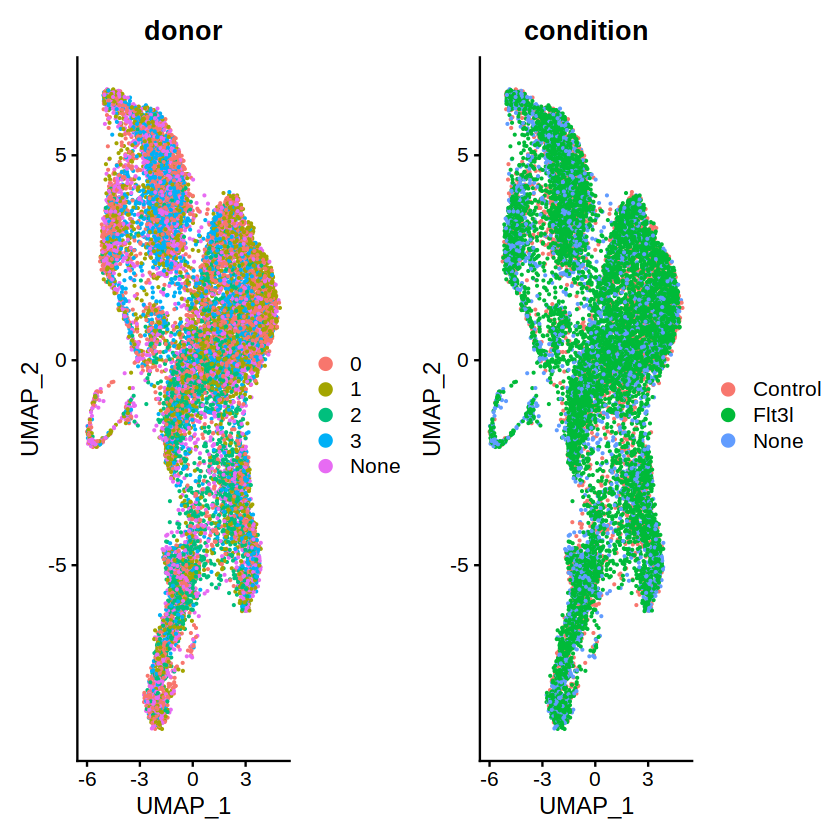

In [15]:
# Idents(t.cells) <- "orig.ident"
DimPlot(object = se, label = FALSE, group.by = c('donor', 'condition')) 
ggsave(file.path(outdir, paste0("donor_umap.pdf")))

Saving 6.67 x 6.67 in image



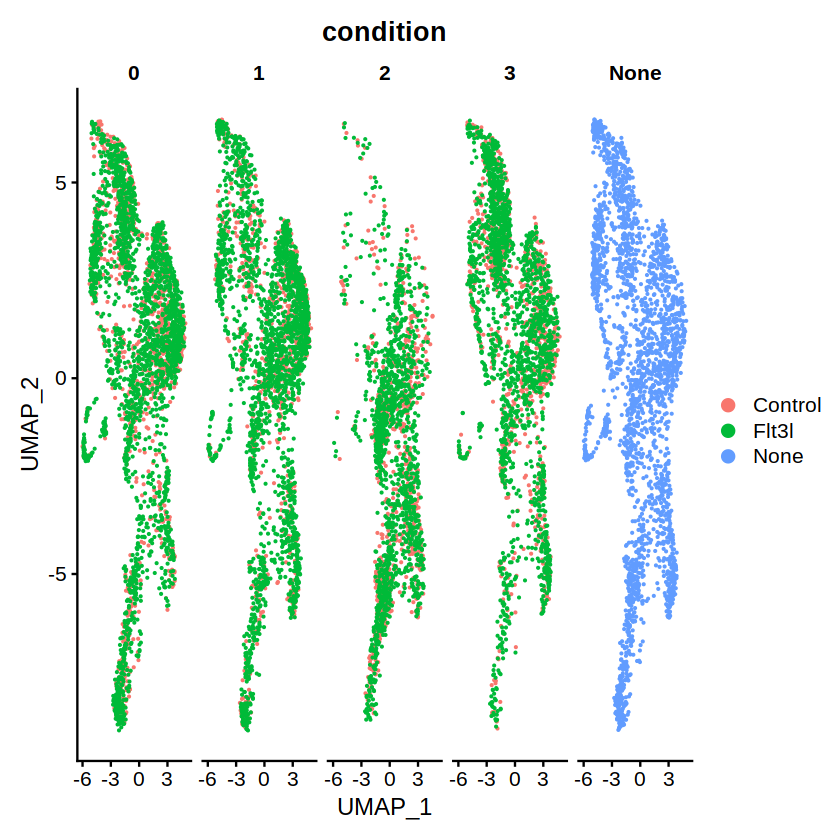

In [16]:
DimPlot(object = se, label = FALSE, split.by="donor", group.by = 'condition')
ggsave(file.path(outdir, paste0("donor_split_umap.pdf")))

## Plot lineage

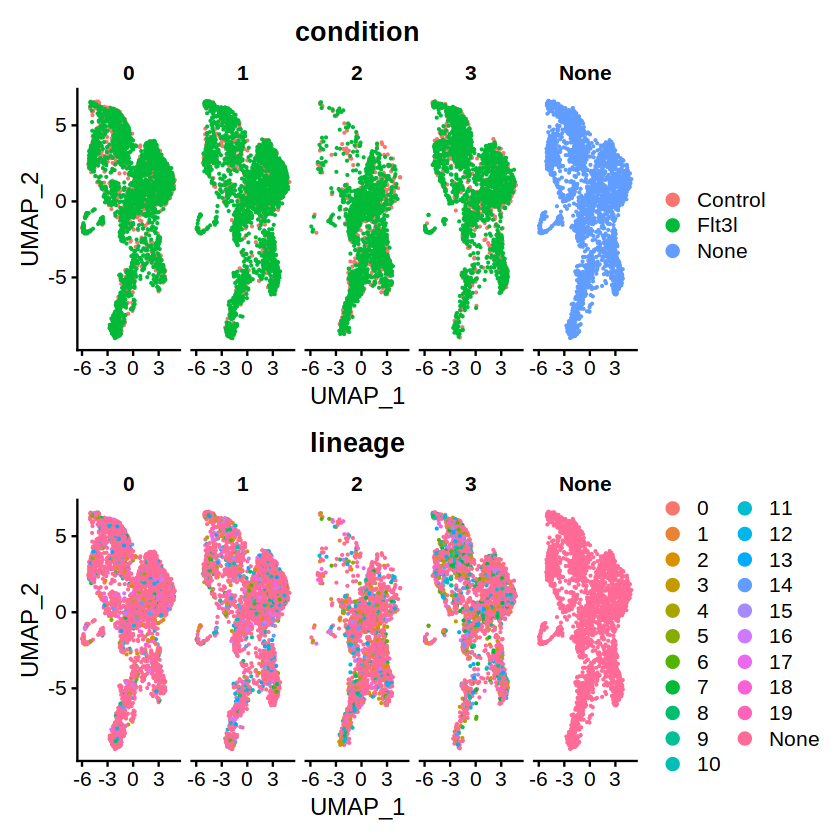

In [17]:
DimPlot(object = se, label = FALSE, split.by=c("donor"), group.by = c('condition', "lineage"))
#ggsave(file.path(outdir, "lineage.conditions.png"))

In [18]:
barplot.df <- se[[]] %>% group_by(name,donor) %>% summarize(size=n())# %>% mutate(donor=donor)
barplot.df

`summarise()` has grouped output by 'name'. You can override using the `.groups` argument.



name,donor,size
<fct>,<fct>,<int>
0_0,0,14
0_1,0,41
0_10,0,22
0_11,0,5
0_12,0,47
0_13,0,84
0_14,0,48
0_15,0,5
0_16,0,95


Saving 6.67 x 6.67 in image



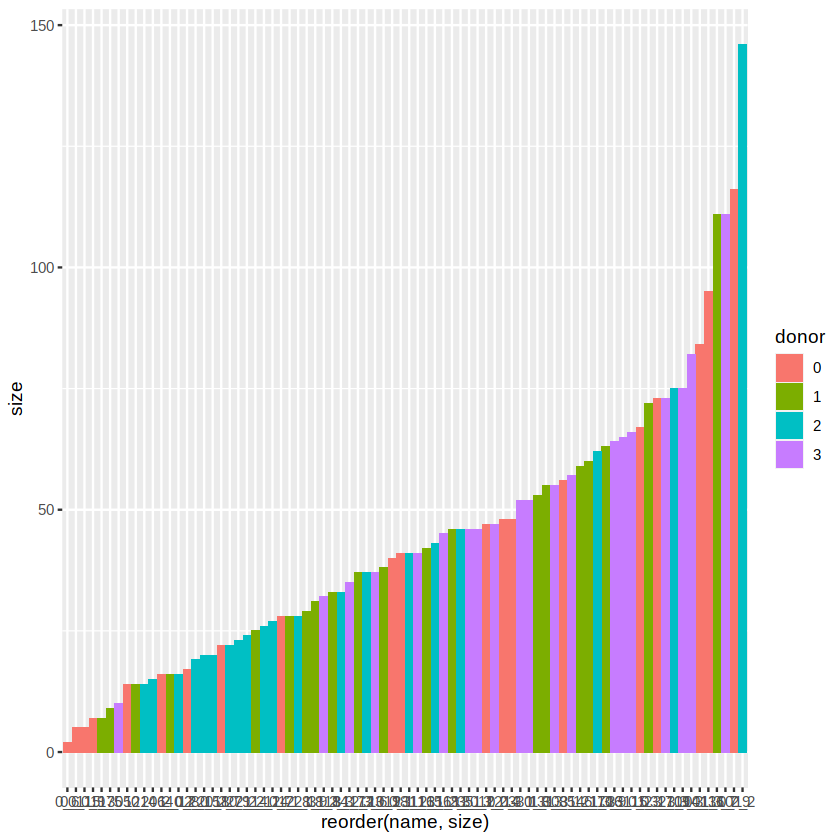

In [19]:
g <- ggplot(barplot.df[!(barplot.df$name == "None" | is.na(barplot.df$name)), ], aes(x=reorder(name, size), y= size, fill=donor)) + 
            geom_bar(stat='identity')

g
ggsave(file.path(outdir, paste0("clone_count.pdf")))

## Save

In [20]:
saveRDS(obj=se, file=file.path(outdir, "SE.rds"))

In [21]:
print

function (x, ...) 
UseMethod("print")
<bytecode: 0x564dbb350878>
<environment: namespace:base>